# constant 、 placeholder 和 Variable 创建变量

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
sess = tf.InteractiveSession()

In [4]:
import sys
sys.path

['E:\\MyGitHub\\MyMLStudy\\Tensorflow',
 'D:\\anaconda3\\python37.zip',
 'D:\\anaconda3\\DLLs',
 'D:\\anaconda3\\lib',
 'D:\\anaconda3',
 '',
 'D:\\anaconda3\\lib\\site-packages',
 'D:\\anaconda3\\lib\\site-packages\\win32',
 'D:\\anaconda3\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda3\\lib\\site-packages\\Pythonwin',
 'D:\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\liucuili\\.ipython']

In [3]:
cons1 = tf.constant([1, 2, 3], shape=[2, 3])
cons = sess.run(cons1)
cons

array([[1, 2, 3],
       [3, 3, 3]])

In [6]:
cons = sess.run(cons1)
cons

array([[1, 2, 3],
       [3, 3, 3]])

In [ ]:
sess.close()

In [9]:
#占位符shape不设时会按传入参数自行匹配
node1 = tf.placeholder(tf.float32)  # , shape=[4, 5])
node2 = tf.placeholder(tf.float32)  # , shape=[4, 5])
op = tf.multiply(node1, node2)
session = tf.Session()
const1 = tf.constant(np.random.rand(4, 5))
const2 = tf.constant(np.random.rand(4, 5))
#可以传入初始化后的常量
print(session.run(op, {node1: session.run(const1), node2: session.run(const2)}))
#也可以直接传入张量，其实同初始化后的常量一致
print(session.run(op, {node1: np.random.rand(2, 3), node2: np.random.rand(2, 3)}))

[[0.6016169  0.01108792 0.37198558 0.04608814 0.59260416]
 [0.0663191  0.21001635 0.23842624 0.49881825 0.4023646 ]
 [0.00069065 0.25793388 0.03455277 0.21280093 0.22620995]
 [0.05591312 0.2859325  0.32768962 0.42842382 0.3761263 ]]
[[0.05451127 0.2949233  0.27610126]
 [0.6486801  0.5835067  0.12109372]]


In [ ]:
W = tf.Variable(initial_value=tf.zeros([9, 5]),  # 初始值，必填，张量或可以转换为张量的Python对象。初始值必须有指定一个形状，除非`validate_shape`设置为False。
                trainable=True,  # 如果`True`，则默认值也将变量添加到图形中集合`GraphKeys.TRAINABLE_VARIABLES`。这个集合用作“Optimizer”类使用的默认变量列表
                collections=None,  # 图表集合键的列表。新的变量被添加到这些集合。默认为`[GraphKeys.GLOBAL_VARIABLES]`。
                validate_shape=True,  # 如果`False`，允许变量用初始化未知形状的值。如果“True”，默认的形状`initial_value`必须是已知的。
                caching_device=None,  # 可选设备字符串，描述变量的位置应该被缓存以供阅读。默认为变量的设备。如果不是“None”，则缓存在另一个设备上。典型的用途是缓存在使用变量的Ops所在的设备上进行重复数据删除复制`Switch`和其他条件语句。
                name='W',  # 变量的可选名称。默认为“Variable”并获取自动去重（Variable_1,Variable_2....）。
                variable_def=None, # `VariableDef`协议缓冲区。如果不是“无”，则重新创建变量对象及其内容，引用变量的节点在图中，必须已经存在。图形没有改变。`variable_def`和其他参数是互斥的。
                dtype=tf.float32, # 如果设置，initial_value将被转换为给定的类型。如果`None'，数据类型将被保存（如果`initial_value`是一个张量），或者“convert_to_tensor”来决定。
                expected_shape=None,  # 张量的Shape。如果设置，initial_value需要符合这个形状。
                import_scope=None)  # 可选的字符串。名称范围添加到`Variable.`仅在从协议缓冲区初始化时使用。

In [12]:
W = tf.Variable(tf.zeros([3, 10]), dtype=tf.float32, name='W')
W

<tf.Variable 'W_2:0' shape=(3, 10) dtype=float32_ref>

# truncated_normal 和 random_normal

tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)

参数:

    shape: 一维的张量，也是输出的张量。
    mean: 正态分布的均值。 
    stddev: 正态分布的标准差。
    dtype: 输出的类型。
    seed: 一个整数，当设置之后，每次生成的随机数都一样。
    name: 操作的名字

生成的值服从具有指定平均值和标准偏差的正态分布，如果生成的值大于平均值2个标准偏差的值则丢弃重新选择。

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [74]:
a = tf.Variable(tf.random_normal([1,10],mean=100.0,seed=1))
b = tf.Variable(tf.truncated_normal([2,2],seed=2))

In [75]:
init = tf.global_variables_initializer()

In [83]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(a))
    print("\n")
    print(sess.run(b))

[[-1.6226364   2.9691975   0.13065875 -4.8854084   0.1984968   1.1824486
   1.1856459  -4.245859   -1.4457945  -0.11254076  1.2870896  -0.52864814
   3.7132664   1.1356834  -0.7656718  -2.9706867   2.5235422  -0.05061216
  -0.5292594   3.0656276  -3.4859543  -0.8757859  -1.13202     0.6413385
   2.265662   -4.5565143   0.96562403 -2.6254175   0.71370065 -3.4605668
  -0.08033547  1.7993238  -2.7611783   2.9629247  -0.4909896  -1.4652944
  -0.3917929   0.14341602  1.2659618  -3.1423814   2.6587625  -2.346734
   0.06308919  0.95410496  0.87388396 -0.6336178  -0.90150064 -3.6121314
   0.24979928 -1.5413084  -1.4924831  -0.5639065  -3.917631   -0.6752214
   2.0603967   3.0268035   0.4503161  -0.57132417  0.5376509   3.492422
   1.8477421  -4.1181993  -0.6287661   2.4206765   1.389606   -2.1311
   0.02728022 -2.135425   -0.3681501  -4.411247    3.6581185   2.4863803
  -0.67311025 -0.08001776 -0.67171043 -0.61489797 -1.5338594  -0.57421666
  -0.5894057  -1.6198126  -2.6318038   0.7506483   0.

In [77]:
num = 100

In [84]:
a = tf.Variable(tf.random_normal([1,num],seed=1,stddev=2))
b = tf.Variable(tf.truncated_normal([1,num],seed=2,stddev=0.1))
c = tf.constant(0.1, shape=[2, 3])

In [85]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [86]:
data = c
data = sess.run(data)
data.sort()

In [36]:
#aaa,bbb

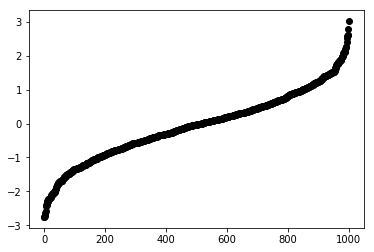

In [28]:
x = np.arange(0,num) 
plt.figure()
plt.scatter(x,data,c = 'black',marker = 'o') 
plt.show()

ValueError: color kwarg must have one color per dataset

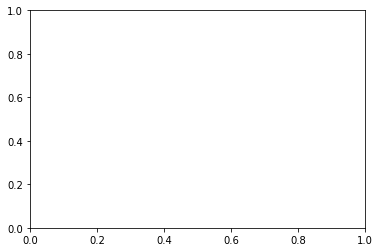

In [87]:
import seaborn as sns
x = np.arange(0,num) 
plt.figure()
sns.distplot(data, bins=10, kde=False, color="red") 
plt.show()

In [11]:
type(x),type(aaa),x,aaa

(numpy.ndarray,
 numpy.ndarray,
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([-0.8113182 ,  1.4845988 ,  0.06532937, -2.4427042 ,  0.0992484 ,
         0.5912243 ,  0.59282297, -2.1229296 , -0.72289723, -0.05627038],
       dtype=float32))

In [82]:
tf.Variable(bbb)

<tf.Variable 'Variable_22:0' shape=(1, 100) dtype=float32_ref>

In [1]:
import tensorflow as tf

x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    y = tf.square(x)
y_grad = tape.gradient(y, x)        # 计算y关于x的导数
print([y, y_grad])

[<tf.Tensor: id=9, shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: id=13, shape=(), dtype=float32, numpy=6.0>]


In [2]:
y

<tf.Tensor: id=9, shape=(), dtype=float32, numpy=9.0>

In [3]:
y_grad

<tf.Tensor: id=13, shape=(), dtype=float32, numpy=6.0>